# ORIE 4580/5580/5581 Assignment 5

#### Students: Marco La Vecchia  (mal426), Mohamed Kane (mek298)

### [Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.


Start by computing the expected number of visits:

$$
\mathbb{E}[X_{\text{total}}] = N \lambda
$$

$$
\mathbb{E}[X_{\text{tagged}}] = M \lambda
$$

where $N$ is the total population.

---
Using the method of moments, we set the sample averages equal to their expectations, s.t

$$
28.8 = N \lambda \\
6 = 10 \lambda
$$

Using these two equations above, we compute
$$
\lambda = \frac{6}{10} = 0.6
$$

$$
28.8 = N(0.6)
$$

$$
\hat{N} = \frac{28.8}{0.6} = 48
$$

---


Therefore, the estimated total number of red-tailed hawks in Ithaca is **48**.


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



In [ ]:
import numpy as np
from math import comb

# Given data
M = 10   # number of tagged hawks
n = 20   # total unique hawks observed
k = 4    # tagged hawks observed

# Likelihood function for N (Hypergeometric)
def hypergeo_likelihood(N, M, n, k):
    if N < n or N < M:  # population must be large enough
        return 0
    return comb(M, k) * comb(N - M, n - k) / comb(N, n)

# Search over plausible population sizes
N_values = np.arange(max(M, n), 200)   # try N from 20 up to 200
likelihoods = [hypergeo_likelihood(N, M, n, k) for N in N_values]

# Find the MLE (N that maximizes the likelihood)
N_hat = N_values[np.argmax(likelihoods)]

print(f"MLE estimate for total hawk population: N̂ = {N_hat}")


MLE estimate for total hawk population: N̂ = 49


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

Let the true demand be
$$
N \sim \text{Geometric}(p)
$$ with

$$
P(N = k) = (1 - p)^k p, \quad k = 0, 1, 2, \dots
$$

The observed sales are censored at 40:

$$
Y =
\begin{cases}
N, & \text{if } N < 40, \\
40, & \text{if } N \ge 40.
\end{cases}
$$


Therefore, the PMF of \(Y\) is:

$$
P(Y = k) =
\begin{cases}
(1 - p)^k p, & k = 0, 1, 2, \dots, 39, \\
(1 - p)^{40}, & k = 40.
\end{cases}
$$


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
import pandas as pd
df = pd.read_csv("Soup_sales_data.csv")
Y = df.iloc[:, 0].values  # assumes single-column CSV

cap = 40
uncensored = Y[Y < cap]
censored = Y[Y >= cap]

u = len(uncensored)             # number of uncensored observations
c = len(censored)               # number of censored observations
S = uncensored.sum()            # sum of uncensored counts

p_hat = u / (u + S + cap * c)

print(f"Number of observations (n): {len(Y)}")
print(f"Uncensored count (u): {u}")
print(f"Censored count (c): {c}")
print(f"Sum over uncensored (S): {S}")
print(f"MLE estimate of p: p̂ = {p_hat:.6f}")


Number of observations (n): 100
Uncensored count (u): 39
Censored count (c): 61
Sum over uncensored (S): 780
MLE estimate of p: p̂ = 0.011967


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

Assign birthdays one by one without repeats:

$$
\Pr(\text{all distinct})
= \frac{365}{365}\cdot\frac{364}{365}\cdots\frac{365-(n-1)}{365}
= \frac{(365)_n}{365^n}
= \frac{365!}{(365-n)!\,365^n}.
$$

Here $(365)_n = 365\cdot 364 \cdots (365-n+1)$ is the falling factorial.

$$
\Pr(\text{at least one shared birthday})
= 1 - \Pr(\text{all distinct})
= 1 - \frac{(365)_n}{365^n}
= 1 - \frac{365!}{(365-n)!\,365^n}.
$$


## Ans.

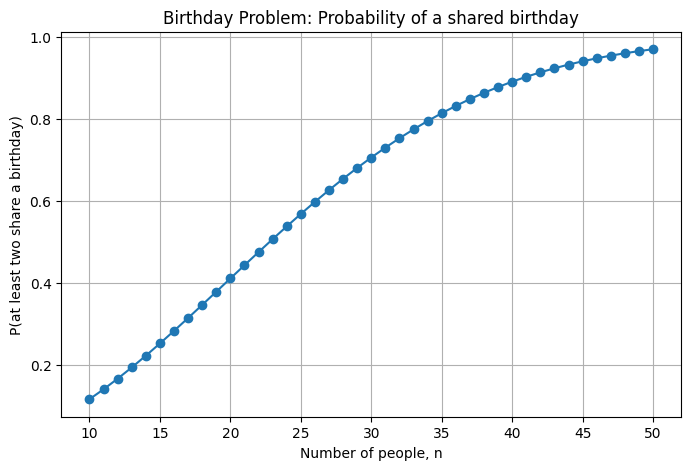

n = 10 → P = 0.1169
n = 11 → P = 0.1411
n = 12 → P = 0.1670
n = 13 → P = 0.1944
n = 14 → P = 0.2231
n = 15 → P = 0.2529
n = 16 → P = 0.2836
n = 17 → P = 0.3150
n = 18 → P = 0.3469
n = 19 → P = 0.3791
n = 20 → P = 0.4114
n = 21 → P = 0.4437
n = 22 → P = 0.4757
n = 23 → P = 0.5073
n = 24 → P = 0.5383
n = 25 → P = 0.5687
n = 26 → P = 0.5982
n = 27 → P = 0.6269
n = 28 → P = 0.6545
n = 29 → P = 0.6810
n = 30 → P = 0.7063
n = 31 → P = 0.7305
n = 32 → P = 0.7533
n = 33 → P = 0.7750
n = 34 → P = 0.7953
n = 35 → P = 0.8144
n = 36 → P = 0.8322
n = 37 → P = 0.8487
n = 38 → P = 0.8641
n = 39 → P = 0.8782
n = 40 → P = 0.8912
n = 41 → P = 0.9032
n = 42 → P = 0.9140
n = 43 → P = 0.9239
n = 44 → P = 0.9329
n = 45 → P = 0.9410
n = 46 → P = 0.9483
n = 47 → P = 0.9548
n = 48 → P = 0.9606
n = 49 → P = 0.9658
n = 50 → P = 0.9704


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 365

def prob_shared(n, days=D):
    """
    Compute the probability that at least two of n people share a birthday,
    assuming birthdays are independent and uniformly distributed over 'days' days.
    """
    # First compute the probability that *no* two share a birthday:
    # P(no match) = (days/ days) * ((days−1)/days) * ((days−2)/days) * … * ((days−(n−1))/days)
    if n > days:
        return 1.0  # by pigeonhole, > days people → collision with probability 1
    p_no_match = 1.0
    for k in range(n):
        p_no_match *= (days - k) / days
    # Then probability of at least one match:
    return 1.0 - p_no_match

# Range of n values
n_values = np.arange(10, 51)  # 10 to 50 inclusive
p_values = np.array([prob_shared(n) for n in n_values])

# Plot
plt.figure(figsize=(8,5))
plt.plot(n_values, p_values, marker='o', linestyle='-')
plt.xlabel('Number of people, n')
plt.ylabel('P(at least two share a birthday)')
plt.title('Birthday Problem: Probability of a shared birthday')
plt.grid(True)
plt.show()

# Print a small table
for n, p in zip(n_values, p_values):
    print(f"n = {n:2d} → P = {p:.4f}")


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

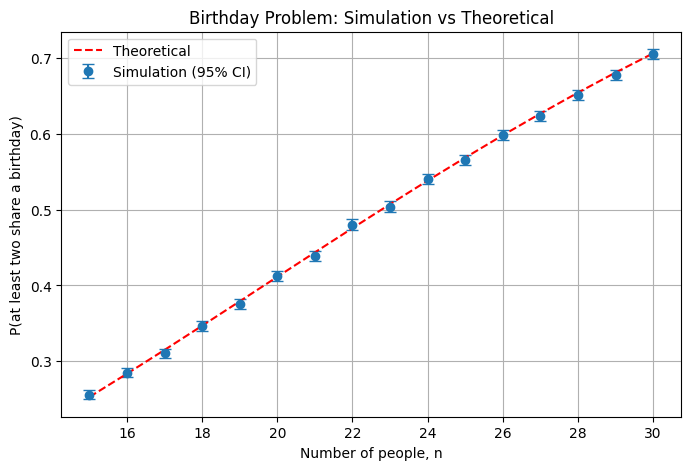

n | Simulation p̂ | 95% CI | Theoretical
15 | 0.26 | [0.25, 0.26] | 0.25
16 | 0.29 | [0.28, 0.29] | 0.28
17 | 0.31 | [0.30, 0.32] | 0.32
18 | 0.35 | [0.34, 0.35] | 0.35
19 | 0.38 | [0.37, 0.38] | 0.38
20 | 0.41 | [0.41, 0.42] | 0.41
21 | 0.44 | [0.43, 0.45] | 0.44
22 | 0.48 | [0.47, 0.49] | 0.48
23 | 0.50 | [0.50, 0.51] | 0.51
24 | 0.54 | [0.53, 0.55] | 0.54
25 | 0.57 | [0.56, 0.57] | 0.57
26 | 0.60 | [0.59, 0.61] | 0.60
27 | 0.62 | [0.62, 0.63] | 0.63
28 | 0.65 | [0.64, 0.66] | 0.65
29 | 0.68 | [0.67, 0.68] | 0.68
30 | 0.71 | [0.70, 0.71] | 0.71


In [ ]:
# --- (b) Simulating the Birthday Problem ---
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
days = 365
n_values = np.arange(15, 31)   # n = 15 to 30 inclusive
num_sim = 20000                # number of Monte Carlo simulations per n

def has_shared_birthday(n, days=365):
    """Return True if at least two people in n share a birthday."""
    birthdays = np.random.randint(0, days, size=n)
    return len(np.unique(birthdays)) < n

# Simulation to estimate probabilities and 95% CIs
p_hat, ci_lower, ci_upper = [], [], []
z = norm.ppf(0.975)  # 95% confidence z-score (~1.96)

for n in n_values:
    results = [has_shared_birthday(n, days) for _ in range(num_sim)]
    mean_est = np.mean(results)
    se = np.sqrt(mean_est * (1 - mean_est) / num_sim)
    p_hat.append(mean_est)
    ci_lower.append(mean_est - z * se)
    ci_upper.append(mean_est + z * se)

# Theoretical probabilities (from part a)
def theoretical_prob(n, days=365):
    if n > days: return 1.0
    p_no_match = np.prod([(days - k) / days for k in range(n)])
    return 1 - p_no_match

theoretical = [theoretical_prob(n, days) for n in n_values]

# --- Plot the results ---
plt.figure(figsize=(8,5))
plt.errorbar(n_values, p_hat,
             yerr=[np.array(p_hat) - np.array(ci_lower), np.array(ci_upper) - np.array(p_hat)],
             fmt='o', capsize=4, label='Simulation (95% CI)')
plt.plot(n_values, theoretical, 'r--', label='Theoretical')

plt.xlabel('Number of people, n')
plt.ylabel('P(at least two share a birthday)')
plt.title('Birthday Problem: Simulation vs Theoretical')
plt.legend()
plt.grid(True)
plt.show()

# Print the table (rounded to 2 decimal places)
print("n | Simulation p̂ | 95% CI | Theoretical")
for n, ph, lo, hi, th in zip(n_values, p_hat, ci_lower, ci_upper, theoretical):
    print(f"{n:2d} | {ph:.2f} | [{lo:.2f}, {hi:.2f}] | {th:.2f}")


<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

## Ans.

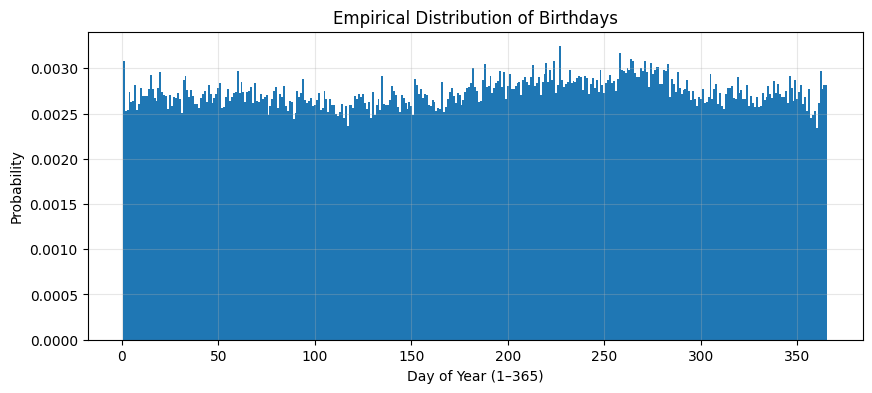

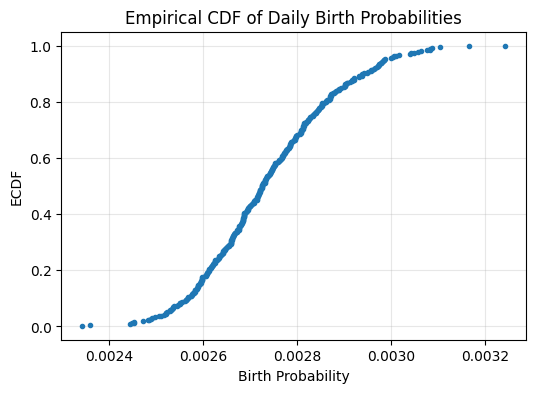

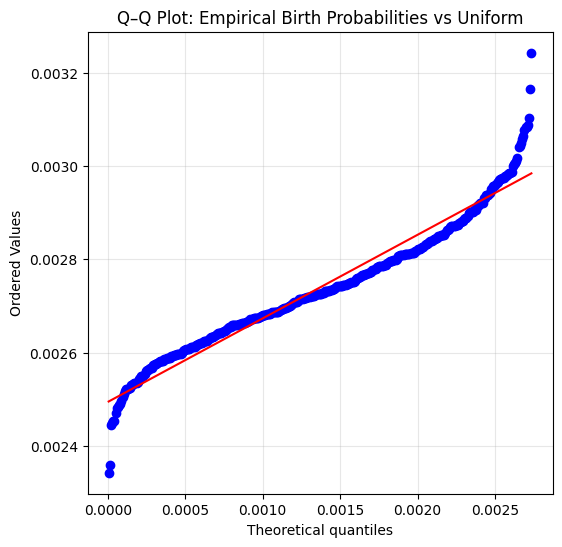

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats

data = np.loadtxt("bdaydata.txt", dtype=str, skiprows=1)
dates = data[:,0]              # '0101', '0102', ...
counts = data[:,1].astype(int) # convert counts to int

probs = counts / counts.sum()

plt.figure(figsize=(10,4))
plt.bar(range(1, len(probs)+1), probs, width=1)
plt.title("Empirical Distribution of Birthdays")
plt.xlabel("Day of Year (1–365)")
plt.ylabel("Probability")
plt.grid(alpha=0.3)
plt.show()

ecdf = ECDF(probs)

plt.figure(figsize=(6,4))
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
plt.title("Empirical CDF of Daily Birth Probabilities")
plt.xlabel("Birth Probability")
plt.ylabel("ECDF")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,6))
stats.probplot(probs, dist=stats.uniform(loc=0, scale=1/365), plot=plt)
plt.title("Q–Q Plot: Empirical Birth Probabilities vs Uniform")
plt.grid(alpha=0.3)
plt.show()


<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

## Chi-square test
df = pd.read_csv("bdaydata.txt", sep=r"\s+")
counts = df.iloc[:, 1].to_numpy()       # daily birth counts, length = 365
N = counts.sum()
expected = np.full_like(counts, fill_value=N/365, dtype=float)
chi2_stat, chi2_p = stats.chisquare(f_obs=counts, f_exp=expected)  # df = 364
print(f"Chi-square GOF: statistic={chi2_stat:.3f}, p-value={chi2_p:.3e}, dof={len(counts)-1}")



Chi-square GOF: statistic=1352.723, p-value=1.249e-113, dof=364


In [ ]:
## K-S test
sample_days = np.repeat(np.arange(1, 366), counts) / 365.0
ks_stat_A, ks_p_A = stats.kstest(sample_days, 'uniform', args=(0.0, 1.0))
print(f"KS (expanded sample): D={ks_stat_A:.4f}, p-value={ks_p_A:.3e}, n={sample_days.size}")


KS (expanded sample): D=0.0155, p-value=7.950e-101, n=480715


we find overwhelming statistical evidence that the empirical distribution of birthdays deviates from a uniform distribution.

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


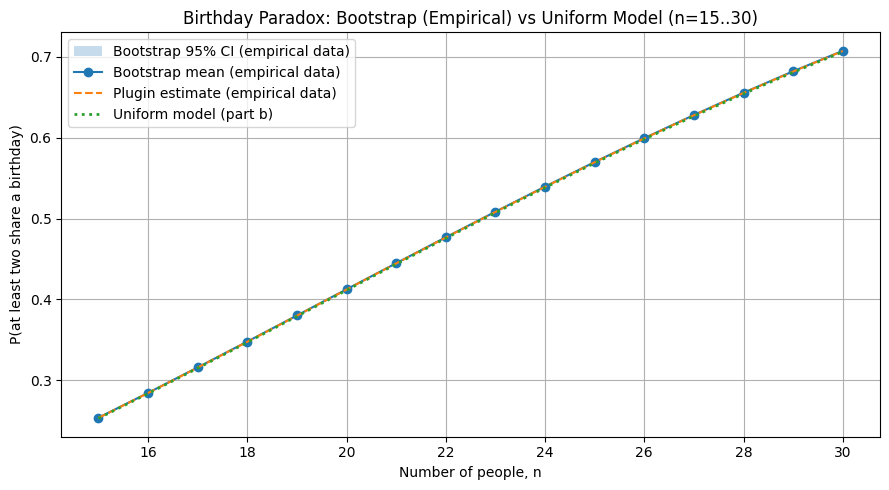

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("bdaydata.txt", sep=r"\s+")
counts = df.iloc[:, 1].to_numpy(dtype=np.int64)   # daily counts length=365
N = int(counts.sum())
p = counts / N
from math import factorial

def collision_probs_all(p_vec, n_values):
    max_n = int(np.max(n_values))
    # e[k] will store elementary symmetric polynomials for k=0..max_n
    e = np.zeros(max_n + 1, dtype=np.float64)
    e[0] = 1.0
    for pi in p_vec:
        # update backwards to avoid overwriting needed terms
        for k in range(max_n, 0, -1):
            e[k] += pi * e[k-1]
    # P(no collision for n) = n! * e[n]; then P(shared) = 1 - that
    out = {}
    for n in n_values:
        p_no = factorial(int(n)) * e[int(n)]
        p_no = min(max(p_no, 0.0), 1.0)           # numeric guard
        out[int(n)] = 1.0 - p_no
    return np.array([out[int(n)] for n in n_values], dtype=np.float64)

def uniform_theoretical(n_values, days=365):
    vals = []
    for n in n_values:
        if n > days:
            vals.append(1.0)
            continue
        k = np.arange(n, dtype=np.float64)
        p_no = np.prod((days - k) / days)
        vals.append(1.0 - p_no)
    return np.array(vals, dtype=np.float64)


rng = np.random.default_rng(2025)
n_values = np.arange(15, 31)       # 15..30 inclusive
B = 2000                           # number of bootstrap resamples

# Point estimate from empirical p (plugin)
p_plugin = collision_probs_all(p, n_values)

boot_mat = np.empty((B, len(n_values)), dtype=np.float64)
for b in range(B):
    counts_star = rng.multinomial(N, p)
    p_star = counts_star / N
    boot_mat[b, :] = collision_probs_all(p_star, n_values)

lower = np.percentile(boot_mat, 2.5, axis=0)
upper = np.percentile(boot_mat, 97.5, axis=0)
boot_mean = boot_mat.mean(axis=0)

theory_uniform = uniform_theoretical(n_values)


plt.figure(figsize=(9,5))
# Bootstrap band
plt.fill_between(n_values, lower, upper, alpha=0.25, label='Bootstrap 95% CI (empirical data)')
plt.plot(n_values, boot_mean, marker='o', linestyle='-', label='Bootstrap mean (empirical data)')
# Also show the plugin estimate line (often overlaps the mean closely)
plt.plot(n_values, p_plugin, linestyle='--', linewidth=1.5, label='Plugin estimate (empirical data)')

# Uniform curve from (b)
plt.plot(n_values, theory_uniform, linestyle=':', linewidth=2, label='Uniform model (part b)')

plt.xlabel('Number of people, n')
plt.ylabel('P(at least two share a birthday)')
plt.title('Birthday Paradox: Bootstrap (Empirical) vs Uniform Model (n=15..30)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [ ]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

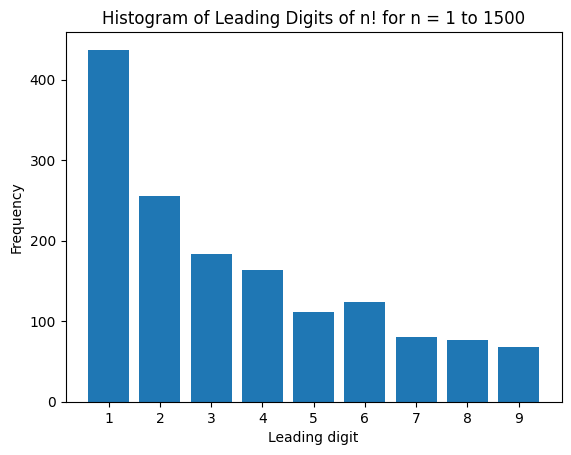

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# number of factorials to compute
n = 1500

# compute factorials of 0, 1, ..., n-1 (we will ignore 0! later)
# from scipy.misc import factorial
# fact_series = factorial(np.arange(n),exact=True)
fact_series = np.array([math.factorial(i) for i in range(n)])

# extract first digits
first_digit = np.zeros(n)
for i in range(n):
    first_digit[i] = int(str(fact_series[i])[0])

# plot histogram of leading digits
plt.figure()
plt.hist(first_digit[1:], bins=np.arange(1,11)-0.5, rwidth=0.8)  # skip 0! since its leading digit is 1 by definition
plt.xticks(range(1,10))
plt.xlabel("Leading digit")
plt.ylabel("Frequency")
plt.title("Histogram of Leading Digits of n! for n = 1 to 1500")
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [ ]:
import numpy as np
from scipy.stats import chisquare
import math

n = 1500
first_digits = [int(str(math.factorial(i))[0]) for i in range(1, n+1)]

obs_counts = np.array([first_digits.count(d) for d in range(1,10)])

exp_counts = np.array([n/9]*9)

# chi-square test
chi_stat, p_value = chisquare(f_obs=obs_counts, f_exp=exp_counts)
print("Chi-square:", chi_stat)
print("p-value:", p_value)


Chi-square: 667.5120000000002
p-value: 7.04135769230954e-139


This follows Benford's Law. P value is close to 0 so cannot be modeled with a uniform dist.

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [ ]:
import numpy as np
import math
from scipy.stats import chisquare

# compute first digits for n! for n = 1,...,1500
n = 1500
first_digits = [int(str(math.factorial(i))[0]) for i in range(1, n+1)]

# observed counts of digits 1..9
obs_counts = np.array([first_digits.count(d) for d in range(1,10)])

# Benford probabilities: p(d)=log10(d+1)−log10(d)
benford_probs = np.array([np.log10(d+1) - np.log10(d) for d in range(1,10)])

# expected counts under Benford's Law
exp_counts = n * benford_probs

# chi-square test
chi_stat, p_value = chisquare(f_obs=obs_counts, f_exp=exp_counts)

print("Observed counts:", obs_counts)
print("Expected counts (Benford):", np.round(exp_counts, 2))
print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)


Observed counts: [437 255 183 164 112 124  80  77  68]
Expected counts (Benford): [451.54 264.14 187.41 145.37 118.77 100.42  86.99  76.73  68.64]
Chi-square statistic: 9.768287282336878
p-value: 0.2816672796372299


This is consistent with Benford's law and is well modeled by the dist.

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

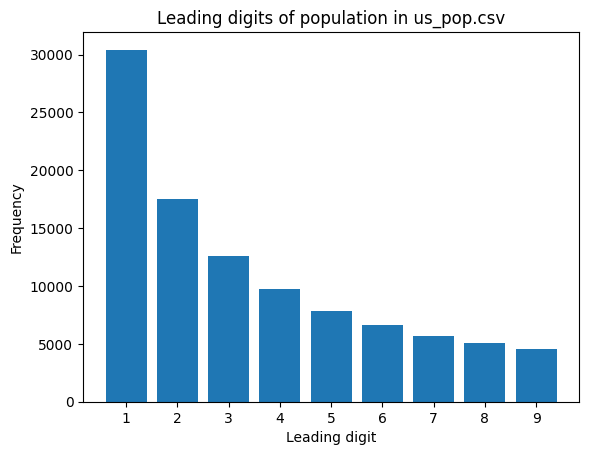

Observed counts: [30420 17560 12615  9702  7841  6594  5637  5088  4543]
Uniform:  chi2 = 50323.5357, p = 0
Benford:  chi2 = 11.8432, p = 0.158337


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# read CSV (assumes file already present)
df = pd.read_csv('us_pop.csv')
col = df.select_dtypes(include=[np.number]).columns[0]  # first numeric column
vals = df[col].dropna().values

# leading digit extractor (returns 1–9, skips others)
def lead_digit(x):
    s = str(x).strip()
    if s and s[0] in '+-': s = s[1:]
    s = s.lstrip('0').lstrip('.')  # remove leading zeros/decimal
    for ch in s:
        if ch.isdigit() and ch != '0':
            return int(ch)
    return np.nan

digits = pd.Series([lead_digit(v) for v in vals]).dropna().astype(int)
digits = digits[(digits>=1) & (digits<=9)]

# histogram
plt.figure()
plt.hist(digits, bins=np.arange(1,11)-0.5, rwidth=0.8)
plt.xticks(range(1,10))
plt.xlabel("Leading digit"); plt.ylabel("Frequency")
plt.title(f"Leading digits of {col} in us_pop.csv")
plt.show()

# chi-square tests
obs = np.array([(digits==d).sum() for d in range(1,10)], dtype=float)
n = obs.sum()

# uniform
exp_uni = np.ones(9) * (n/9)
chi_uni, p_uni = chisquare(f_obs=obs, f_exp=exp_uni)

# benford
benford_p = np.array([np.log10(d+1) - np.log10(d) for d in range(1,10)])
exp_ben = n * benford_p
chi_ben, p_ben = chisquare(f_obs=obs, f_exp=exp_ben)

print("Observed counts:", obs.astype(int))
print("Uniform:  chi2 = %.4f, p = %.6g" % (chi_uni, p_uni))
print("Benford:  chi2 = %.4f, p = %.6g" % (chi_ben, p_ben))


They do not follow a uniform distribution but they do follow Benford's law.

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

it is reasonable to assume that

$$\log_{10}(X)$$

is **uniform** on $[0,6]$.  
Only the **fractional part** matters for the leading digit, so let

$$Y = \{\log_{10}(X)\}$$

Then $Y$ is uniform on $[0,1)$.

A number has leading digit $d$ if

$$d \le \frac{X}{10^k} < d+1$$

Taking $\log_{10}$:

$$\log_{10}(d) \le Y < \log_{10}(d+1)$$

Since $Y$ is uniform on $[0,1)$, the probability that the leading digit is $d$ is the length of this interval:

$$P(\text{leading digit} = d) = \log_{10}(d+1) - \log_{10}(d)$$

This is **Benford’s Law**.
